<a href="https://colab.research.google.com/github/Arnava-03/sentiment_analysis_Amazon_review/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


IMPORTING THE DATASET


In [10]:
#import the dataset
df = pd.read_csv('/content/drive/MyDrive/amazon_review_dataset/Reviews.csv')

In [12]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [14]:
df.shape

(568454, 10)

In [15]:
#check missing values
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [8]:
# since useful entries like SCORE and TEXT feedback have no missing values, we can go ahead with the dataset

In [27]:
values = dict(df['Score'].value_counts().sort_index())
print(values)

{1: 52268, 2: 29769, 3: 42640, 4: 80655, 5: 363122}


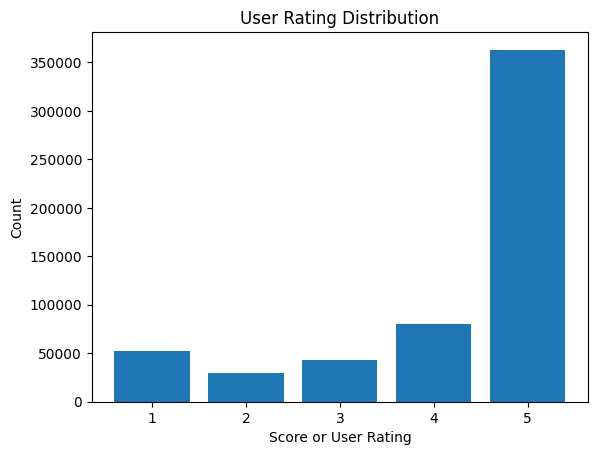

In [33]:
plt.bar(values.keys(), values.values())
plt.xlabel('Score or User Rating')
plt.ylabel('Count')
plt.title('User Rating Distribution')
plt.show()

## Standard VADER approach


Vader stands for Valence Aware Dictionary and sEntiment Reasoner <br>


*   It is an NLTK module for performing sentiment analysis
*   Uses the 'bag of words' approach to get negative/neutral/positive scores on the text provided

In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [36]:
mod = SentimentIntensityAnalyzer()

In [37]:
print((mod.polarity_scores('This is the worst movie')))
print((mod.polarity_scores('This is the best movie')))
# compound score is an aggregate of all the 3 scores ranging from -1 to 1.

{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249}
{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}
